In [2]:
import numpy as np
import cv2
import sys
sys.path.append("../tracking")
from fish import *
from flow import *
from testcase_tracking import *

import numpy as np
from time import sleep

/home/schristo/.anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/schristo/.anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/schristo/.anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../tracking/videoOPS.py:44: RuntimeWarning: invalid value encountered in floor_divide
  mean_img = mean_img // ctr


In [3]:
def calculate_average_flow(flow_hist):
    def magnitude(direction):
        return np.sqrt(np.sum(direction**2,axis=1))
    avg = []
    
    for flow in flow_hist:
        flow[np.where(flow < 1e-2)] = 0
        idx = np.where(flow > 0)
        value = magnitude(flow[idx[0],idx[1]]).mean()
        avg.append(value)
    avg = np.array(avg)
    mean = np.mean(avg)
    std  = np.std(avg)
    
    # Ausreißer auf mittelwert setzen
    avg[np.where(avg > mean + 2*std)] = mean
    avg[np.where(avg < mean - 2*std)] = mean
    
    avg *= 0.3
    return list(avg)


def mvmnt(flow):
    x = flow[:,:,0].flatten()
    y = flow[:,:,1].flatten()
    d = np.sqrt(x**2+y**2)
    return d
def cmS(pxlF):
    return pxlF*0.3*30*(1/16)

# Fische schwimmen Gerade aus
---

20 verschiedene geschwindigkeiten


In [3]:
rad = (5,10)
img_shape = (600,1200,3)

Video_param = {
    "img_shape" : img_shape,
    "radius"    : rad,
    "start_area": (rad[1]*5,img_shape[0]-20),
    "velocity"  : 5,
    "direction" : [1,0],
    "nbr"       : 10,
    "seed"      : 150,
}

hist,flow_history,draw_flow_hist,image_history = getData2Ttrack(Video_param,showframes=False)

In [4]:
assigned_per_frames,CORRECT,WRONG = getAssignedPerFrame(hist,flow_history,gridsize = 50)

print("Correct: {:.2f}\nWrong  : {:.2f}\nRatio  : {:.2f}\n".format(CORRECT,WRONG,CORRECT/(WRONG+CORRECT)))

Correct: 1387.00
Wrong  : 63.00
Ratio  : 0.96



/home/schristo/.anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/schristo/.anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [5]:
follow = assigned_per_frames[0].keys

keys   = [k for k in hist]

def drawConnection(connection,first,second,img,tofollow):
    found1 = None
    found2 = None
    if tofollow not in connection:
        return img
    for a in first:
        if a.getID() == tofollow:
            found1 = a
        
    for a in second:
        if a.getID() == connection[tofollow]:
            found2 = a

    p1 = found1.index()
    p2 = found2.index()
    cv2.line(img,p1,p2,(255,0,0),5)
    
    return img
            
    
    

for frame in range(len(flow_history)):

    g0 = GridStructure(25)
    g1 = GridStructure(25)

    agents = [copy.copy(hist[k][frame])for k in keys]
    agents1 = [hist[k][frame+1] for k in keys] 
    img = np.zeros(img_shape)
    g0.addAgents(agents)
    g1.addAgents(agents1)
    g0.Grid2img(img)
    g0.agents2Img(img)
    g1.agents2Img(img,(0,0,255),(0,255,255))
    
    for key in keys:
        img = drawConnection(assigned_per_frames[frame],agents,agents1,img,key)
    
    show_image(img)
    sleep(0.25)

AttributeError: 'NoneType' object has no attribute 'index'

---

### Velocity x 2




In [5]:
rad = (5,10)
img_shape = (600,1200,3)

Video_param = {
    "img_shape" : img_shape,
    "radius"    : rad,
    "start_area": (rad[1]*5,img_shape[0]-20),
    "velocity"  : 10,
    "direction" : [1,0],
    "nbr"       : 10,
    "seed"      : 150,
}

hist,flow_history,draw_flow_hist,image_history = getData2Ttrack(Video_param,showframes=False)
assigned_per_frames,CORRECT,WRONG = getAssignedPerFrame(hist,flow_history,gridsize = 50)

print("Correct: {:.2f}\nWrong  : {:.2f}\nRatio  : {:.2f}\n".format(CORRECT,WRONG,CORRECT/(WRONG+CORRECT)))

Correct: 623.00
Wrong  : 67.00
Ratio  : 0.90



In [11]:
follow = assigned_per_frames[0].keys

keys   = [k for k in hist]

def drawConnection(connection,first,second,img,tofollow):
    found1 = None
    found2 = None
    if tofollow not in connection:
        return img
    for a in first:
        if a.getID() == tofollow:
            found1 = a

    for a in second:
        if a.getID() == connection[tofollow]:
            found2 = a

    p1 = found1.index()
    p2 = found2.index()
    cv2.line(img,p1,p2,(255,0,0),5)
    
    return img
            
    
    

for frame in range(len(flow_history)):

    g0 = GridStructure(25)
    g1 = GridStructure(25)

    agents = [copy.copy(hist[k][frame])for k in keys]
    agents1 = [hist[k][frame+1] for k in keys] 
    img = np.zeros(img_shape)
    g0.addAgents(agents)
    g1.addAgents(agents1)
    g0.Grid2img(img)
    g0.agents2Img(img)
    g1.agents2Img(img,(0,0,255),(0,255,255))
    
    for key in keys:
        img = drawConnection(assigned_per_frames[frame],agents,agents1,img,key)
    
    show_image(img)
    sleep(0.25)

AttributeError: 'NoneType' object has no attribute 'index'

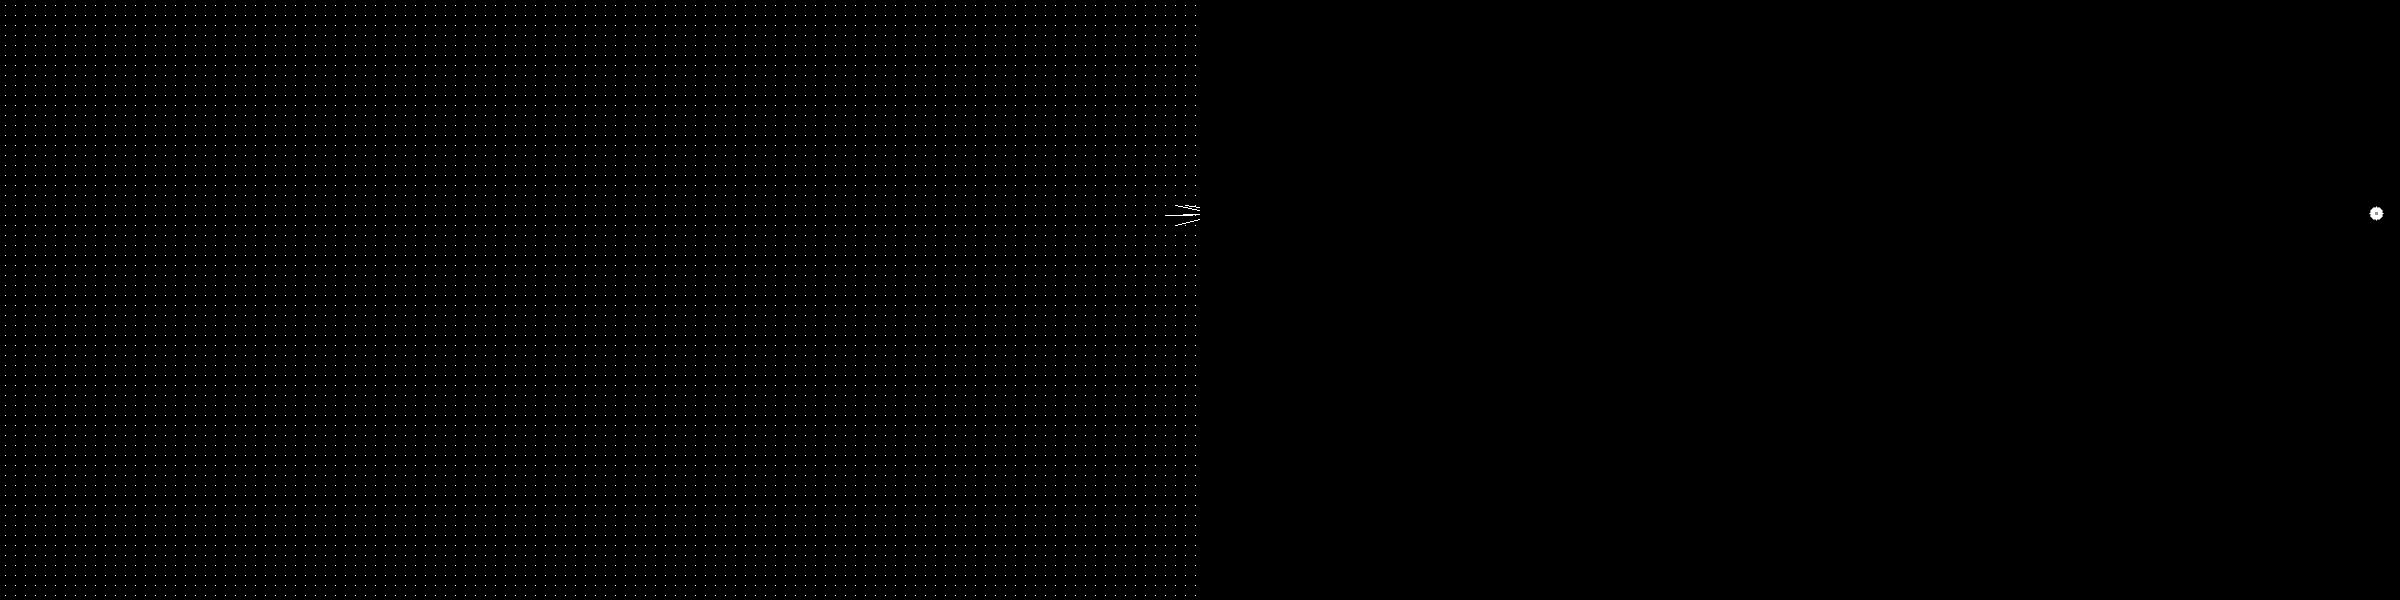

In [4]:
rad = (5,10)
img_shape = (600,1200,3)

Video_param = {
    "img_shape" : img_shape,
    "radius"    : rad,
    "start_area": (rad[1]*5,img_shape[0]-20),
    "velocity"  : 1,
    "direction" : [1,0],
    "nbr"       : 10,
    "seed"      : 150,
}
V = np.linspace(1, 40, 20, endpoint=True)
Data = {}
for v in V:
    Video_param["velocity"] = v
    hist,flow_history,draw_flow_hist,image_history = getData2Ttrack(Video_param,showframes=True)
    assigned_per_frames,CORRECT,WRONG = getAssignedPerFrame(hist,flow_history,gridsize = 25)
    Data[v] = {"assigned_per_frames" : assigned_per_frames,
               "CORRECT": CORRECT,
               "WRONG"  : WRONG,
               "magnitude"   :  [ mvmnt(flow).max() for flow in flow_history]}

# Milling Formation
---


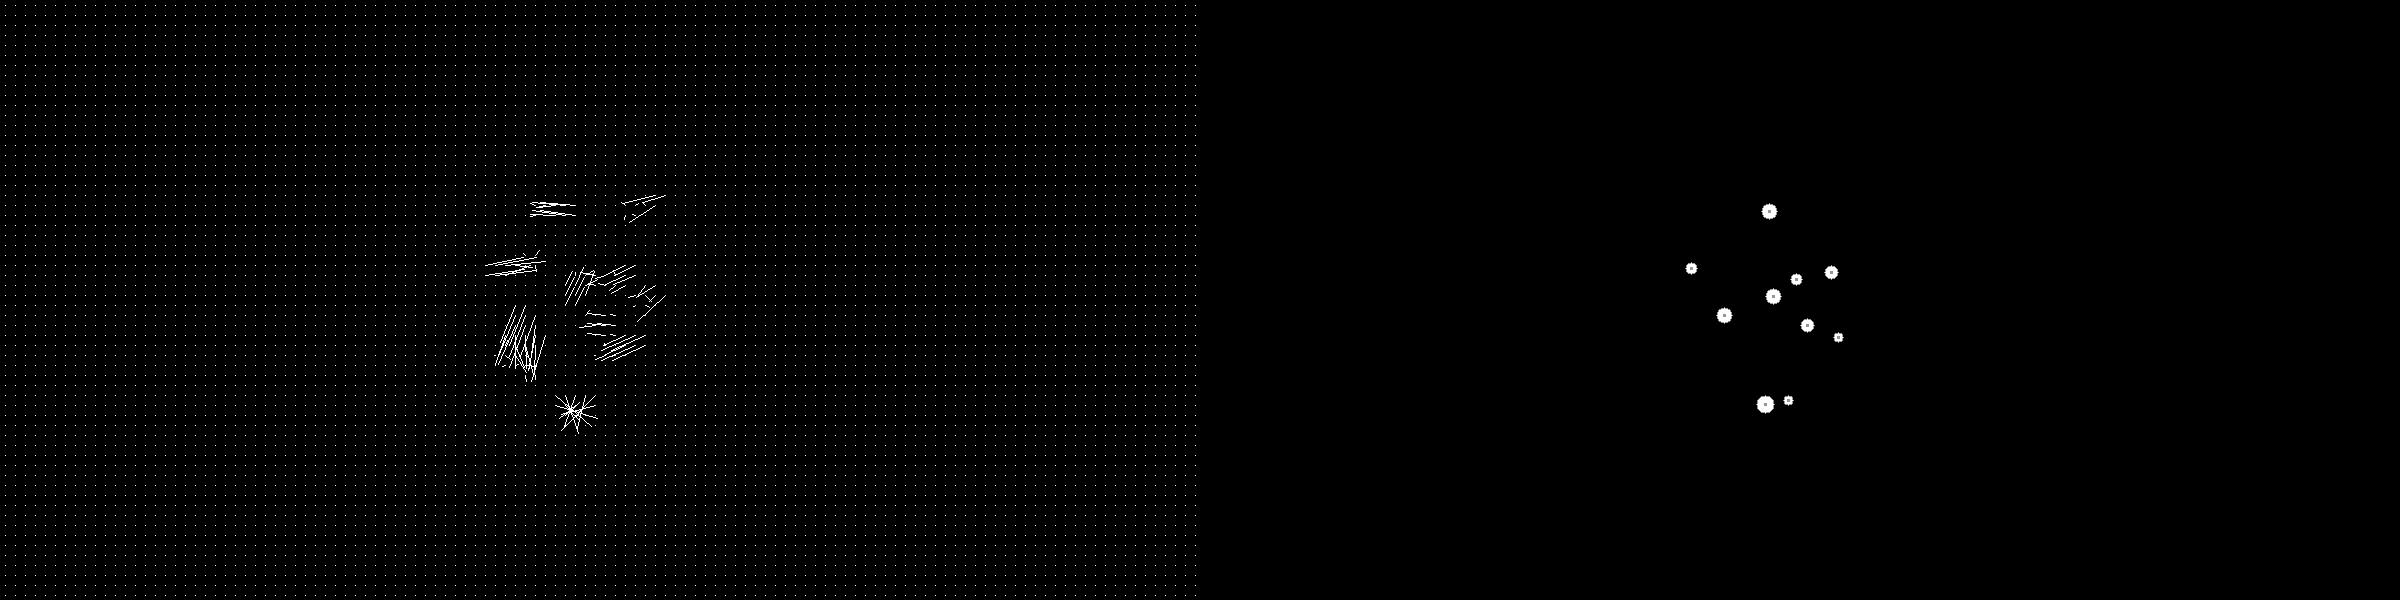

In [5]:
rad = (5,10)
rad_from_center=100
img_shape = (600,1200,3)
from functools import partial
import math

mu = 0
sigma = 1
def init_function(img_shape,rad,nbr):
    
    h,w = img_shape[:2]
    middle = ((h//2),(w//2))

    x = np.random.randint(low=middle[0]-rad,high=middle[0]+rad,size=nbr)
    y = np.random.randint(low=middle[1]-rad,high=middle[1]+rad,size=nbr)
    return x,y

def circular_movement(point,angle):
    h, w = img_shape[:2]
    origin = ((w//2),(h//2))
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    jiggle_x = np.random.normal(mu, sigma)
    jiggle_y = np.random.normal(mu, sigma)
    qx += jiggle_x
    qy += jiggle_y

    return qx.astype(np.int32), qy.astype(np.int32)


nbr = 10

Video_param = {
    "img_shape" : img_shape,
    "radius"    : rad,
    "start_area": (rad[1]*5,img_shape[0]-20),
    "velocity"  : 5,
    "direction" : [1,0],
    "nbr"       : nbr,
    "seed"      : 150,
    "move_rout" : circular_movement,
    "angle"     : 0.1,
    "init_func" : partial(init_function,img_shape=img_shape,rad=rad_from_center,nbr=nbr),
    "frames"    : 300
}

V_milling = np.linspace(1,40, 20, endpoint=True)
Data_milling = {}
for v in V_milling:
    Video_param["angle"] = (v/180)*math.pi
    hist,flow_history,draw_flow_hist,image_history = getData2Ttrack(Video_param,showframes=True)
    assigned_per_frames,CORRECT,WRONG = getAssignedPerFrame(hist,flow_history,gridsize = 25)
    Data_milling[v] = {"assigned_per_frames" : assigned_per_frames,
               "CORRECT": CORRECT,
               "WRONG"  : WRONG,
               "magnitude"   :  [ mvmnt(flow).max() for flow in flow_history]}

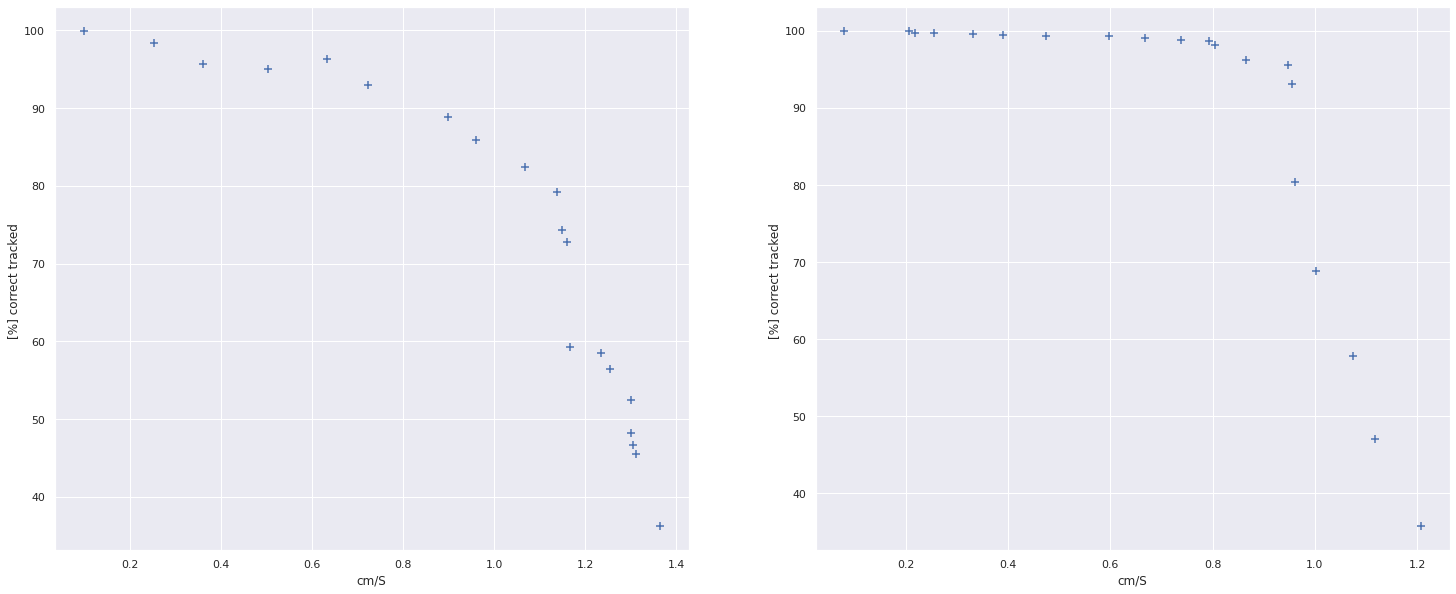

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(20,8)})

def perc(data):
    w = data["WRONG"]
    c = data["CORRECT"]
    return c/(w+c)*100


fig, (ax1, ax2) = plt.subplots(1, 2,sharey=False,figsize=(25,10))

y = [ perc(Data[key]) for key in Data]
x = sorted([ np.mean(Data[key]["magnitude"]) for key in Data],reverse=False)

y1 = sorted([ perc(Data_milling[key]) for key in Data_milling],reverse=True)
x1 = sorted([ np.mean(Data_milling[key]["magnitude"]) for key in Data_milling],reverse=False)

ax1.scatter(np.array(x)*0.016, y, color='b',marker="+",s=70)
ax2.scatter(np.array(x1)*0.016,y1, color='b',marker="+",s=70)
ax2.set_xlabel("cm/S")
ax2.set_ylabel("[%] correct tracked ")
ax1.set_ylabel("[%] correct tracked ")
ax1.set_xlabel("cm/S")
#ax2.set_xticks(np.linspace(5, 80 , 10, endpoint=True).astype(np.int))
#ax1.set_xticks()

plt.show()
np.savez("tracking_10",x=x,y=y,x1=x1,y1=y1)